<a href="https://colab.research.google.com/github/ShahZebYousafzai/Deep-Learning-Basics/blob/main/4_CNN_and_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

> **🔑 Note:** In deep learning, many different kinds of model architectures can be used for different problems. For example, you could use a [convolutional neural network](https://en.wikipedia.org/wiki/Convolutional_neural_network) for making predictions on image data and/or text data. However, in practice some architectures typically work better than others.


## Get the data

CNNs work very well with images. To understand this, we will need some visual  data. 

We will be using [Food-101 dataset](https://www.kaggle.com/dansbecker/food-101) and build a Food Vision System which will recognize the food. The Food-101 dataset consists of 101 categories of food. Each category consists of 1000 images which makes 101000 images in total.

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

First we'll download the pizza_steak subset from https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb .zip file and unzip it.

> **🔑 Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or doesn't work) before scaling up

In [1]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-10-10 07:42:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 142.250.1.128, 108.177.121.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   171MB/s    in 0.6s    

2021-10-10 07:42:39 (171 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



## Inspect the data (become one with it)

A very crucial step at the beginning of machine learning project is becoming with a data.

And for computer vision project ... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 1 images in pizza_steak.
There are 2 directories and 1 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.
There are 2 directories and 1 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.


pizza_steak
  * test
    * Pizza - 250 images
    * Steak - 250 images
  * train
    * Pizza - 750 images
    * Steak - 750 images



In [6]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Oct 10 07:42 .
drwxr-xr-x 1 root root 4096 Oct 10 07:42 ..
-rw-r--r-- 1 root root 6148 Oct 10 07:42 .DS_Store
drwxr-xr-x 4 root root 4096 Oct 10 07:42 test
drwxr-xr-x 4 root root 4096 Oct 10 07:42 train


In [7]:
# Another way to find out how many images are there in a folder
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [8]:
# Get classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from subdirectories
class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [9]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (We'll view images from here)
  target_folder = target_dir + "/" +target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

Image shape: (512, 512, 3)


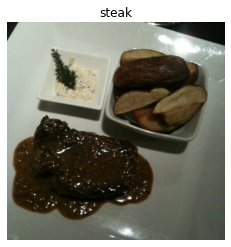

In [10]:
# View a random image from training dataset
img = view_random_image(target_dir="pizza_steak/train", target_class="steak")

Image shape: (512, 384, 3)


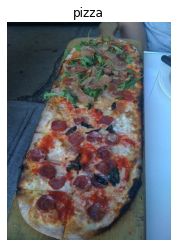

In [11]:
# View a random image from training dataset for pizza
img = view_random_image(target_dir="pizza_steak/train", target_class="pizza")

Our images are larger arrays and we can check that out.

In [12]:
img

array([[[  3,  13,  15],
        [  5,  15,  17],
        [  8,  18,  20],
        ...,
        [ 97, 153, 200],
        [ 94, 150, 197],
        [ 79, 135, 182]],

       [[  4,  14,  16],
        [  6,  16,  18],
        [  8,  17,  22],
        ...,
        [101, 157, 204],
        [ 98, 154, 201],
        [ 85, 141, 188]],

       [[  1,  11,  13],
        [  2,  12,  14],
        [  4,  13,  18],
        ...,
        [103, 159, 206],
        [104, 160, 207],
        [ 95, 151, 198]],

       ...,

       [[ 57,  75,  61],
        [ 59,  77,  65],
        [ 63,  81,  69],
        ...,
        [101, 145, 190],
        [102, 146, 191],
        [103, 147, 192]],

       [[ 53,  73,  61],
        [ 54,  72,  60],
        [ 54,  72,  60],
        ...,
        [ 98, 145, 189],
        [ 99, 146, 190],
        [100, 147, 191]],

       [[ 51,  71,  59],
        [ 46,  66,  55],
        [ 43,  63,  52],
        ...,
        [ 97, 144, 188],
        [ 98, 145, 189],
        [ 99, 146, 190]]

In [13]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[  3,  13,  15],
        [  5,  15,  17],
        [  8,  18,  20],
        ...,
        [ 97, 153, 200],
        [ 94, 150, 197],
        [ 79, 135, 182]],

       [[  4,  14,  16],
        [  6,  16,  18],
        [  8,  17,  22],
        ...,
        [101, 157, 204],
        [ 98, 154, 201],
        [ 85, 141, 188]],

       [[  1,  11,  13],
        [  2,  12,  14],
        [  4,  13,  18],
        ...,
        [103, 159, 206],
        [104, 160, 207],
        [ 95, 151, 198]],

       ...,

       [[ 57,  75,  61],
        [ 59,  77,  65],
        [ 63,  81,  69],
        ...,
        [101, 145, 190],
        [102, 146, 191],
        [103, 147, 192]],

       [[ 53,  73,  61],
        [ 54,  72,  60],
        [ 54,  72,  60],
        ...,
        [ 98, 145, 189],
        [ 99, 146, 190],
        [100, 147, 191]],

       [[ 51,  71,  59],
        [ 46,  66,  55],
        [ 43,  63,  52],
        ...,
        [ 97, 144, 18

> **🔑 Note:** We are using our tensors for inputs to our neural network

In [14]:
# View the image shape
img.shape # returns width, height and color channels

(512, 384, 3)

In our case, the width and height vary but because we're dealing with colour images, the colour channels value is always 3. This is for different values of red, green and blue (RGB) pixels.

> **🔑 Note:** Many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

In [15]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.01176471, 0.05098039, 0.05882353],
        [0.01960784, 0.05882353, 0.06666667],
        [0.03137255, 0.07058824, 0.07843137],
        ...,
        [0.38039216, 0.6       , 0.78431373],
        [0.36862745, 0.58823529, 0.77254902],
        [0.30980392, 0.52941176, 0.71372549]],

       [[0.01568627, 0.05490196, 0.0627451 ],
        [0.02352941, 0.0627451 , 0.07058824],
        [0.03137255, 0.06666667, 0.08627451],
        ...,
        [0.39607843, 0.61568627, 0.8       ],
        [0.38431373, 0.60392157, 0.78823529],
        [0.33333333, 0.55294118, 0.7372549 ]],

       [[0.00392157, 0.04313725, 0.05098039],
        [0.00784314, 0.04705882, 0.05490196],
        [0.01568627, 0.05098039, 0.07058824],
        ...,
        [0.40392157, 0.62352941, 0.80784314],
        [0.40784314, 0.62745098, 0.81176471],
        [0.37254902, 0.59215686, 0.77647059]],

       ...,

       [[0.22352941, 0.29411765, 0.23921569],
        [0.23137255, 0.30196078, 0.25490196],
        [0.24705882, 0

## An end-to-end example

Let's build a convolutional neural network to find pattens in our images,more specifically we need a way to:
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

> **🔑 Note:** A baseline is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

> **📖 Resource:** The architecture we're using below is a scaled-down version of VGG-16, a convolutional neural network which came 2nd in the 2014 ImageNet classification competition.

In [16]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Prepare data (get all of the pixel values between 0 & 1 also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Set up path to our directory
train_dir = "/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  # tf.keras.layers.Activations(tf.nn.relu)   # If you use this then in the layer above remove activation="relu"
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 42s 248ms/step - loss: 0.5591 - accuracy: 0.7053 - val_loss: 0.3892 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4209 - accuracy: 0.8173 - val_loss: 0.3634 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 11s 229ms/step - loss: 0.4003 - accuracy: 0.8340 - val_loss: 0.3279 - val_accuracy: 0.8820
Epoch 4/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3721 - accuracy: 0.8447 - val_loss: 0.3227 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.3444 - accuracy: 0.8560 - val_loss: 0.2879 - val_accuracy: 0.8800


> **🔑 Note:** If the cell above takes more than ~12 seconds per epoch to run, you might not be using a GPU accelerator. If you're using a Colab notebook, you can access a GPU accelerator by going to Runtime -> Change Runtime Type -> Hardware Accelerator and select "GPU". After doing so, you might have to rerun all of the above cells as changing the runtime type causes Colab to have to reset.

After 5 epochs, on our two classes, we obtained 85% accuracy on train data and 88% on test data.

In [17]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

> **⚒️ Practice:** Go through CNN explainer website and compare our neural network with theirs: https://poloclub.github.io/cnn-explainer/

### Using the same model as before
Now there are a few new things here we haven't discussed, namely:
* The ImageDataGenerator class and the rescale parameter
* The flow_from_directory() method
* The batch_size parameter
* The target_size parameter
* Conv2D layers (and the parameters which come with them)
* MaxPool2D layers (and their parameters).
* The steps_per_epoch and validation_steps parameters in the fit() function

But first let's replicate the model we've built in previous section to see if it works with our image data.

The model we're building is from the [Tensorflow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,4&seed=0.82711&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false).

We can use all of the same parameters in our previous model except for changing two things:

* The data - we're now working with images instead of dots.
* The input shape - we have to tell our neural network the shape of the images we're working with.
A common practice is to reshape images all to one size. In our case, we'll resize the images to (224, 224, 3), meaning a height and width of 224 pixels and a depth of 3 for the red, green, blue colour channels.

In [18]:
# set the seed
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                                      tf.keras.layers.Dense(4, activation="relu"),
                                      tf.keras.layers.Dense(4, activation="relu"),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 215ms/step - loss: 0.8548 - accuracy: 0.5020 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


Our model did run on the image data, but it performed poorly than the last model

In [19]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Why does our 2nd model has 20x more parameters then our 1st model? Despite that our model is performing poorly.

> **🔑 Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitiely, you might think more is better. And in some cases it is. But in this case, the difference here is in the two different styles of model we're using. Where a series of dense layers have a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though there are less learnable parameters in our convolutional neural network, these are often more helpful in decphering between different **features** in an image.

Let's step up the notch in our model_2! Let's increase the layers and hidden units in our dense layers.

> **🔑 Note:** Adding extra layers or increasing the number of neurons in each layer is often referred to as increasing the complexity of your model.

In [20]:
# set the seed
tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential([
                                      tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
                                      tf.keras.layers.Dense(100, activation="relu"),
                                      tf.keras.layers.Dense(100, activation="relu"),
                                      tf.keras.layers.Dense(100, activation="sigmoid"),
                                      tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 222ms/step - loss: 0.6601 - accuracy: 0.6387 - val_loss: 0.6494 - val_accuracy: 0.6440
Epoch 2/5
47/47 [==============================] - 10s 216ms/step - loss: 0.6364 - accuracy: 0.6800 - val_loss: 0.6054 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.5934 - accuracy: 0.7413 - val_loss: 0.5473 - val_accuracy: 0.7600
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.5355 - accuracy: 0.7527 - val_loss: 0.5183 - val_accuracy: 0.7600
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5474 - accuracy: 0.7420 - val_loss: 0.5150 - val_accuracy: 0.7660


We have seen some improvement (72% accuracy on training data and 75% on our validation accuracy) in our model but not as good as our CNN.

In [21]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


This shows how powerful CNNs are especially for `Computer Vision` and their ability to learn with less parameters. 

## Binary Classification: Let's break it down

What we'll do is:
1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling,normalization & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)



### 1. Become with a Data

In [22]:
import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-10-10 07:46:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.132.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   192MB/s    in 0.5s    

2021-10-10 07:46:08 (192 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


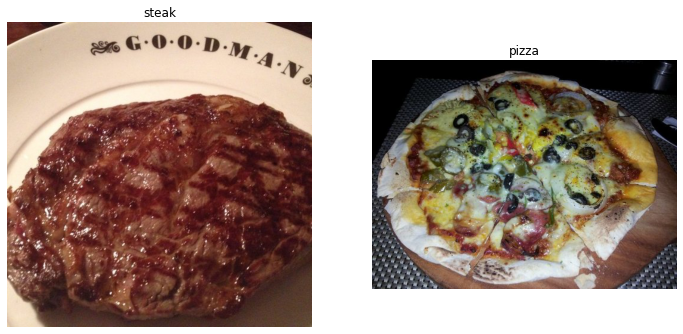

In [23]:
# Visualize data
plt.figure(figsize=(12,12))
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [24]:
# Define the directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into batches.

A **batch** is a small subset of dataset that a model looks at during training. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the momery of your processor (GPU).
2. Trying to learn patterns in 10,000 images in one hit could result in the model not being able to learn very well.

🤔 Why 32?
Beacause 32 is good for your health 😅 ...

In [25]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


The [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator) class helps us prepare our images into batches as well as perform transformations on them as they get loaded into the model.

In [26]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Some things to here:

* Due to how our directories are structured, the classes get inferred by the subdirectory names in `train_dir` and `test_dir`.
* The `target_size` parameter defines the input size of our images in (height, width) format.
* The `class_mode` value of `binary` defines our classification problem type. If we had more than two classes, we would use `categorical`.
* The `batch_size` defines how many images will be in each batch, we've used 32 which is the same as the default.

In [27]:
# Get a sample of a training data batch
images, labels = train_data.next() # Get the "next" batch of images/labels in train_data
len(images), len(labels)

(32, 32)

In [28]:
# How many batches are there?
len(train_data)

47

In [29]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [30]:
images[7].shape

(224, 224, 3)

In [31]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

Now that we preprocessed our data, let's create a model

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required(e.g. look at which current model is working best in your field for your problem).

In [32]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:

# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

The typical CNN structure we've built:

Input -> Conv + ReLU layers (non-linearities) -> Pooling layer -> Fully connected (dense layer) as Output

Let's discuss some of the components of the Conv2D layer:

The "2D" means our inputs are two dimensional (height and width), even though they have 3 colour channels, the convolutions are run on each channel invididually.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-qxxr{background-color:#FFF;border-color:inherit;font-size:16px;text-align:center;vertical-align:top}
.tg .tg-bn4o{font-size:18px;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-gmla{border-color:inherit;font-size:16px;text-align:center;vertical-align:top}
.tg .tg-a41q{background-color:#FFF;border-color:inherit;font-size:18px;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-lvth{font-size:16px;text-align:center;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-a41q">Hyperparameter Name</th>
    <th class="tg-a41q"><span style="font-weight:bold">What does it do?</span></th>
    <th class="tg-bn4o">Typical Values</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-qxxr">Filters</td>
    <td class="tg-qxxr">Decides how many filters should pass over an input tensor (e.g. sliding windows over an<br>input tensor (e.g. sliding windows over an image).</td>
    <td class="tg-lvth">10, 32, 64, 128 (higher values lead to more<br>complex models)</td>
  </tr>
  <tr>
    <td class="tg-gmla">Kernel Size (also called filter size)</td>
    <td class="tg-qxxr">Determines the shape of the filters (sliding<br>windows) over the output.</td>
    <td class="tg-lvth">3, 5, 7 (lowers values learn smaller features,<br>higher values learn large features)</td>
  </tr>
  <tr>
    <td class="tg-qxxr">Padding</td>
    <td class="tg-qxxr">Pads the target tensor with zeroes (if "same")<br>to preserve input shape. Or leaves in the<br>target tensor as is (if "valid"), lowering<br>output shape.</td>
    <td class="tg-lvth">"same" or valid</td>
  </tr>
  <tr>
    <td class="tg-qxxr">Strides</td>
    <td class="tg-qxxr">The number of steps a filter takes across an<br>image at a time (e.g. if strides=1, a filter<br>moves across an image 1 pixel at a time).</td>
    <td class="tg-lvth">1 (default), 2</td>
  </tr>
</tbody>
</table>

> **📖 Resources:** For a great demonstration of these in action, be sure to spend some time going through the following:
* [CNN Explainer Webpage](https://poloclub.github.io/cnn-explainer/) - a great visual overview of many of the concepts we're replicating here with code.
* [A guide to convolutional arithmetic for deep learning](https://arxiv.org/pdf/1603.07285.pdf) - a phenomenal introduction to the math going on behind the scenes of a convolutional neural network.
* For a great explanation of padding, see this [Stack Overflow](https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t/39371113#39371113) answer.

In [34]:
# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [35]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [36]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [37]:
# Fit the model
history_4 = model_4.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 13s 257ms/step - loss: 1.0958 - accuracy: 0.6693 - val_loss: 0.4618 - val_accuracy: 0.8060
Epoch 2/5
47/47 [==============================] - 11s 242ms/step - loss: 0.4469 - accuracy: 0.8040 - val_loss: 0.3985 - val_accuracy: 0.8260
Epoch 3/5
47/47 [==============================] - 11s 241ms/step - loss: 0.3391 - accuracy: 0.8607 - val_loss: 0.4621 - val_accuracy: 0.7860
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 0.1698 - accuracy: 0.9473 - val_loss: 0.4525 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 11s 241ms/step - loss: 0.0474 - accuracy: 0.9893 - val_loss: 0.6895 - val_accuracy: 0.7620


### 5. Evaluating our model

It looks like our baseline model is learning so let's evaluate it.

In [38]:
model_4.evaluate(test_data)

16/16 [==============================] - 3s 166ms/step - loss: 0.6895 - accuracy: 0.7620


[0.6894533038139343, 0.7620000243186951]

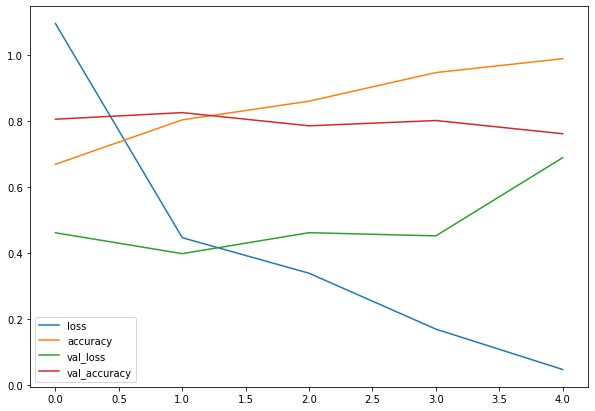

In [39]:
# Plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [40]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs have we run

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

> 🔑 **Note:** When a model's validation loss starts to **increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset too *well* and thus the model's ability to generalize to unseen data will be diminished.

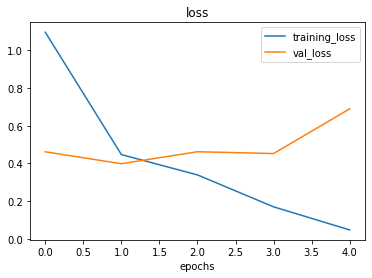

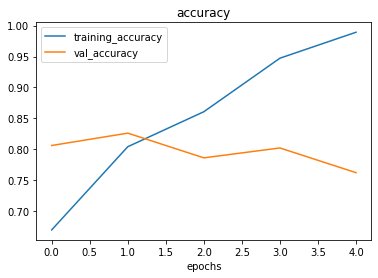

In [41]:
# Check out loss and accuracy of model_4
plot_loss_curves(history_4)

We can look that our validation loss is increasing and training loss is decreasing, so it means our data is overfitting.

> 🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreases at similar rate), when there are large differences your model may be overfitting or underfitting.

### 6. Adjust the model parameter

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data..

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

Let's add `MaxPool2D` to our model and see if it will battle overfitting.

In [42]:
# Create the model (this will be our new baseline model)
model_5 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

In [43]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [44]:
# Fit the model
history_5 = model_5.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 223ms/step - loss: 0.6169 - accuracy: 0.6680 - val_loss: 0.4443 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4523 - accuracy: 0.7947 - val_loss: 0.3927 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 10s 214ms/step - loss: 0.4178 - accuracy: 0.8140 - val_loss: 0.3434 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 10s 215ms/step - loss: 0.3971 - accuracy: 0.8307 - val_loss: 0.3266 - val_accuracy: 0.8840
Epoch 5/5
47/47 [==============================] - 10s 217ms/step - loss: 0.3660 - accuracy: 0.8393 - val_loss: 0.4034 - val_accuracy: 0.8000


In [45]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

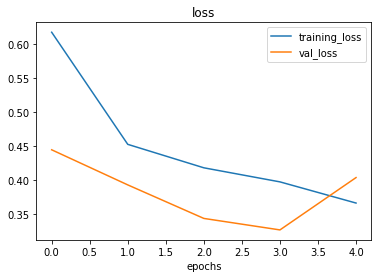

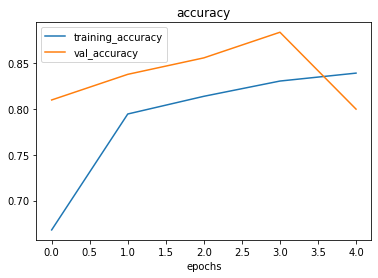

In [46]:
# Plot loss curves
plot_loss_curves(history_5)

It's better then the last time but it's still not the best. Let's try `data augmentation`.

### Opening our bag of tricks and finding data augmentation

In [47]:
# Create ImageDataGenerator training instances
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,  # how much do you want to rotate an image?
                                             shear_range=0.2, # how much do you want to shear an image?
                                             zoom_range=0.2,  # Zoom in randomly in your image
                                             width_shift_range=0.2, # move your image on x-axis
                                             height_shift_range=0.3,  # move your image on your y-axis
                                             horizontal_flip=True) # do you want to flip an image?

# Create ImageDataGenerator for training without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator for test without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

> 🤔 **Question:** What is [data augmentation](https://www.tensorflow.org/tutorials/images/data_augmentation)?

Data Augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [48]:
# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demonstration purpose

# Create Non-augmented train data batches
print("Non-Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

# Create Non-augmented test data batches
print("Non-Augmented testing data")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode="binary",
                                              shuffle=False)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented testing data
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in directories but are modified as they're loaded into the model.

Finally ... let's visualize some augmented data!!!

In [49]:
# Get sample data batches
images, labels = train_data.next()
aug_images, aug_labels = train_data_augmented.next()  # labels are not augmented, they are the same

Showing image number: 21


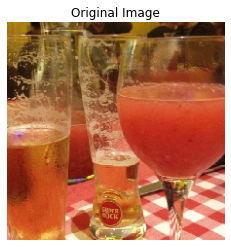

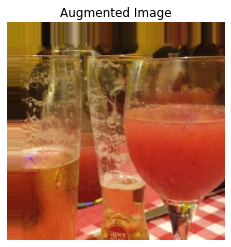

In [50]:
# show original image and augmented image
import random
random_number = random.randint(0, 32) # our batch size is 32
print(f"Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(aug_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False);

Now we've seen what augmented training looks like, let's build a model and see how it learns on augmented data.

In [51]:
# Create a model (same as model_5)
model_6 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 549ms/step - loss: 0.7165 - accuracy: 0.3800 - val_loss: 0.6894 - val_accuracy: 0.5080
Epoch 2/5
47/47 [==============================] - 26s 545ms/step - loss: 0.6943 - accuracy: 0.4487 - val_loss: 0.6863 - val_accuracy: 0.5100
Epoch 3/5
47/47 [==============================] - 26s 550ms/step - loss: 0.6933 - accuracy: 0.4907 - val_loss: 0.6912 - val_accuracy: 0.5720
Epoch 4/5
47/47 [==============================] - 26s 547ms/step - loss: 0.6861 - accuracy: 0.5087 - val_loss: 0.6715 - val_accuracy: 0.5080
Epoch 5/5
47/47 [==============================] - 26s 545ms/step - loss: 0.6896 - accuracy: 0.5333 - val_loss: 0.6709 - val_accuracy: 0.5660


You may have also noticed each epoch taking longer when training with augmented data compared to when training with non-augmented data (~25s per epoch vs. ~10s per epoch).



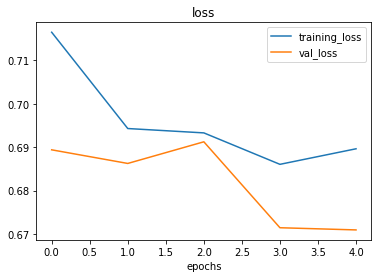

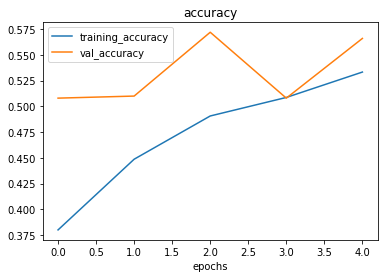

In [52]:
plot_loss_curves(history_6)

We are close but still not perfect.

> 🤔 **Question:** Why didn't our model get very good results on the training set to begin with?

It's because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.

So, let's go ahead and make shuffle to true to see what happens.


In [53]:
# Import data and augment it from training directory with shuffle true
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=True)

Augmented training data
Found 1500 images belonging to 2 classes.


In [54]:
# Create a model (same as model_5)
model_7 = Sequential([
                      Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
                      MaxPool2D(pool_size=2),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Conv2D(10, 3, activation="relu"),
                      MaxPool2D(),
                      Flatten(),
                      Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented,
                      epochs=5,
                      steps_per_epoch=len(train_data_augmented),
                      validation_data=test_data,
                      validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 546ms/step - loss: 0.6091 - accuracy: 0.6513 - val_loss: 0.3996 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 25s 537ms/step - loss: 0.5163 - accuracy: 0.7567 - val_loss: 0.3563 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 25s 532ms/step - loss: 0.4854 - accuracy: 0.7673 - val_loss: 0.3461 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 25s 536ms/step - loss: 0.4708 - accuracy: 0.7860 - val_loss: 0.3742 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 25s 540ms/step - loss: 0.4660 - accuracy: 0.7747 - val_loss: 0.3238 - val_accuracy: 0.8580


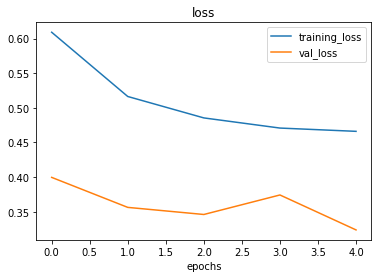

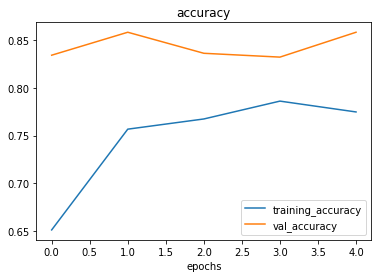

In [55]:
plot_loss_curves(history_7)

It's getting better and better as we have obtained a smooth loss curve and we've seen the importance of shuffling the dataset.

> 🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features accros a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until Satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find ideal learning rate
* Get more data (give the model more opportunities to learn
* Use **transfer learning** to laverage what another model has learned and adjust it for our own case


In [56]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


Let's download some image that I have saved in github repository

--2021-10-10 08:19:47--  https://raw.githubusercontent.com/ShahZebYousafzai/Deep-Learning-Basics/main/Images/04-steak.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 514056 (502K) [image/jpeg]
Saving to: ‘04-steak.jpg’

04-steak.jpg        100%[===================>] 502.01K  --.-KB/s    in 0.04s   

2021-10-10 08:19:47 (13.8 MB/s) - ‘04-steak.jpg’ saved [514056/514056]



(-0.5, 1422.5, 710.5, -0.5)

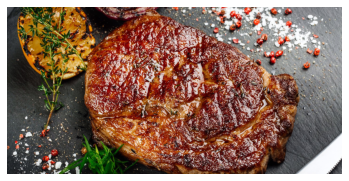

In [70]:
# View our example image
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/ShahZebYousafzai/Deep-Learning-Basics/main/Images/04-steak.jpg
steak = mpimg.imread("04-steak.jpg")
plt.imshow(steak)
plt.axis(False)

In [71]:
# Check the shape of our image
steak.shape

(711, 1423, 3)

In [74]:
model_7.predict(steak)

ValueError: ignored

The error is because our model is also expecting a batch size as well. So instead of 3 dimensions we need 4 dimensions.

In [75]:
tf.expand_dims(steak, axis=0)

<tf.Tensor: shape=(1, 711, 1423, 3), dtype=uint8, numpy=
array([[[[ 79,  82,  87],
         [ 79,  82,  87],
         [ 78,  81,  86],
         ...,
         [133, 136, 141],
         [139, 142, 147],
         [143, 146, 151]],

        [[ 79,  82,  87],
         [ 78,  81,  86],
         [ 77,  80,  85],
         ...,
         [133, 136, 141],
         [134, 137, 142],
         [136, 139, 144]],

        [[ 79,  82,  87],
         [ 78,  81,  86],
         [ 76,  79,  84],
         ...,
         [136, 139, 144],
         [132, 135, 140],
         [130, 133, 138]],

        ...,

        [[ 33,  36,  41],
         [ 25,  28,  33],
         [ 25,  28,  33],
         ...,
         [ 85,  88,  93],
         [102, 105, 110],
         [107, 110, 115]],

        [[ 30,  33,  38],
         [ 32,  35,  40],
         [ 40,  43,  48],
         ...,
         [ 95,  98, 103],
         [107, 110, 115],
         [ 96,  99, 104]],

        [[ 45,  48,  53],
         [ 37,  40,  45],
         [ 30,  3

In [76]:
model_7.predict(tf.expand_dims(steak, axis=0))

ValueError: ignored

> **🔑 Note:** When you train a neural network and you want to make predictions with it on your own custom data, it's important that your custom data (or new data) is preprocessed into same format as the data your model was trained on.

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it to (img_shape, img_shape, color_channels).
  """
# Read in the image
img = tf.io.read_file(filename)

# Decode the read file into a tensor
img = tf.image.decode_image(img)

# Resize the image
img = tf.image.resize(img, size=[img_shape, img_shape])

# Normalize/Rescale the image between 0 and 1
img= img/255.

return img